<a href="https://colab.research.google.com/github/abhay116/AI-Driven-Cardiovascular-Risk-Prediction/blob/main/project_10_heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependents

In [ ]:
!pip install shap
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import shap

Data collection and the processing

In [ ]:
# loading the csv data to a pandas DataFrame
heart_data = pd.read_csv('/content/Heart_Disease_Prediction1.csv')



In [ ]:
# Print first 5 rows of the dataset
heart_data.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [ ]:
#Print the last 5 rows
heart_data.tail()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence
269,67,1,4,160,286,0,2,108,1,1.5,2,3,3,Presence


In [ ]:
#number of rows and colums
heart_data.shape

(270, 14)

In [ ]:
# getting some info bout data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
Age,0
Sex,0
Chest pain type,0
BP,0
Cholesterol,0
FBS over 120,0
EKG results,0
Max HR,0
Exercise angina,0
ST depression,0


In [ ]:
# statistical.measures about the data
heart_data.describe()


,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


In [ ]:
# checking the distru of Heart Disease  variable
heart_data['Heart Disease'].value_counts()

,count
Heart Disease,
Absence,150
Presence,120


Absence is a defective heart

Presence is a Healthy Heart

Splittng up the like Feat and Heart Disease/ target

In [ ]:

X = heart_data.drop(columns='Heart Disease', axis=1)
Y = heart_data['Heart Disease']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X)

     Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0     70    1                4  130          322             0            2   
1     67    0                3  115          564             0            2   
2     57    1                2  124          261             0            0   
3     64    1                4  128          263             0            0   
4     74    0                2  120          269             0            2   
..   ...  ...              ...  ...          ...           ...          ...   
265   52    1                3  172          199             1            0   
266   44    1                2  120          263             0            0   
267   56    0                2  140          294             0            2   
268   57    1                4  140          192             0            0   
269   67    1                4  160          286             0            2   

     Max HR  Exercise angina  ST depression  Slope 

In [ ]:
print(Y)

0      Presence
1       Absence
2      Presence
3       Absence
4       Absence
         ...   
265     Absence
266     Absence
267     Absence
268     Absence
269    Presence
Name: Heart Disease, Length: 270, dtype: object


Splitting it up intoo like Training data and Testing data

In [ ]:
X_train,X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(270, 13) (216, 13) (54, 13)


The Ml model Trainng yk what I mean

Logistic Regression

In [ ]:
model = LogisticRegression()


In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluation

Accuarcy Score Ykwim

In [ ]:
# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [ ]:
print('Accuracy on Training data : ' , training_data_accuracy)

Accuracy on Training data :  0.8796296296296297


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ' , test_data_accuracy)

Accuracy on Test data :  0.8333333333333334


Building a Predictive System

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


prediction: ['Presence']

Feature Contributions to the Prediction:
                    Feature  SHAP Value
7                    Max HR    0.136361
12                 Thallium    0.117773
2           Chest pain type    0.092306
1                       Sex    0.071008
11  Number of vessels fluro    0.070956
8           Exercise angina    0.055878
10              Slope of ST    0.026070
4               Cholesterol    0.013936
5              FBS over 120    0.008285
3                        BP   -0.000948
0                       Age   -0.009698
9             ST depression   -0.023973
6               EKG results   -0.039112
The Person has Heart Disease. It is important to take action immediately.
Consult a doctor or cardiologist for further evaluation.
 Follow a heart-healthy diet low in saturated fats and sodium.
 Engage in moderate exercise if approved by a healthcare provider.
 Take prescribed medications and monitor blood pressure/cholesterol levels.
 Reduce stress and get adequate rest

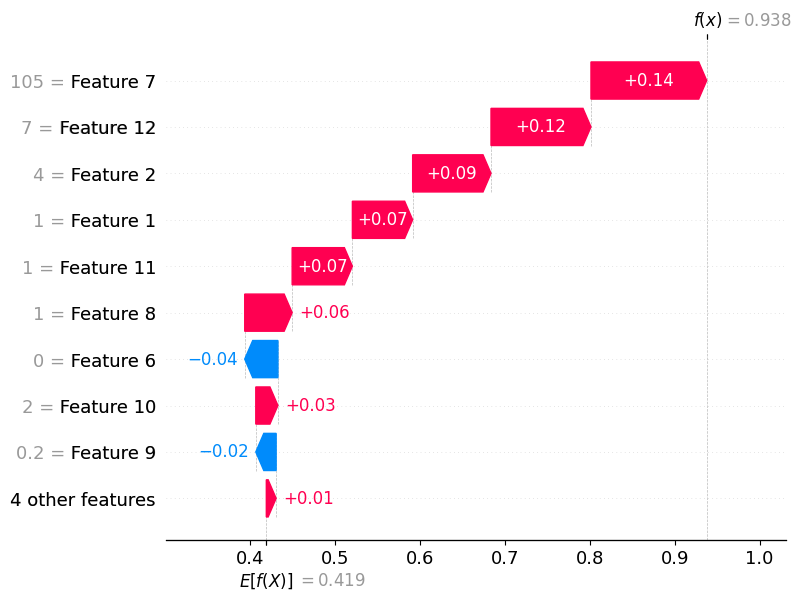

In [ ]:
import numpy as np
put_data = (29,1,2,130,204,0,2,202,0,0,1,0,3)


# change the input data t a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# Re - initialized and train the model before making predictions
#This ensures the 'model' variable is defined in the current scope
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)
# Make a prediction
prediction = model.predict(input_data_reshaped)
print("prediction:" , prediction)

#Exlpain the prediction using SHAP values

explainer = shap.Explainer(model.predict_proba, X_train)
shap_values = explainer(input_data_reshaped)

# Display SHAP values
print("\nFeature Contributions to the Prediction:")
shap_values_array = shap_values.values[0][:, 1]
shap_values_df = pd.DataFrame({'Feature': X_train.columns, 'SHAP Value' : shap_values_array})
shap_values_df = shap_values_df.sort_values(by="SHAP Value" , ascending=False)
print(shap_values_df)

if (prediction[0] == 'Absence'):#Compare with the string 'Absence'
  print('The Person does not have a Heart Disease. However, maintaining a healthy lifestyle is important!')
  print("Eat a balanced diet with fruits, vegetables, and whole grains.")
  print("Stay physically active with regular exercise.")
  print("Manage stress and get enough sleep.")
  print("Avoid smoking and excessive alcohol consumption.")
else:
  print('The Person has Heart Disease. It is important to take action immediately.')
  print("Consult a doctor or cardiologist for further evaluation.")
  print(" Follow a heart-healthy diet low in saturated fats and sodium.")
  print(" Engage in moderate exercise if approved by a healthcare provider.")
  print(" Take prescribed medications and monitor blood pressure/cholesterol levels.")
  print(" Reduce stress and get adequate rest.")

  # logging predictions and SHAP values for further analysis
  with open("heart_disease_predictions_log.txt", "a") as log_file:
   log_file.write(f"Input: {input_data}, Prediction: {prediction[0]}, SHAP Values: {shap_values.values[0]}\n")

  # plot SHAP values (optinoal, for visual interpretation)
  shap.plots.waterfall(shap_values[0][:, 1]) # Access the SHAP values for the 'Presence' class (index 1)




